## Импортируем модули.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import preprocessing
from scipy import stats

## Импортируем датасеты (X_bp.xlsx, X_nup.xlsx) и объединяем используя INNER.

In [2]:
df_x_bp = pd.read_excel('../data/raw/X_bp.xlsx', sheet_name='X_bp.csv')
df_x_nup = pd.read_excel('../data/raw/X_nup.xlsx', sheet_name='X_nup.csv')
df_bp_nup = df_x_bp.merge(df_x_nup, left_index=True, right_index=True, how='inner')

### Удаляем лишние колонки - индексы датасетов

In [3]:
df_bp_nup.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'],axis = 1, inplace=True)

## На этапе POC_v00 переосмыслили данные, выявили область с сырыми данными. Поэтому выделяем область, увеличиваем объем данных и анализируем.

In [4]:
df_bp_nup = df_bp_nup[df_bp_nup.index <= 22]

In [5]:
df = pd.concat([df_bp_nup, df_bp_nup, df_bp_nup, df_bp_nup, df_bp_nup, df_bp_nup, df_bp_nup])
df_bp_nup = pd.concat([df, df, df, df, df, df, df])
df_bp_nup = df_bp_nup.sample(frac=1).reset_index(drop=True)

## Проводим анализ датасета:

In [6]:
df_bp_nup.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.000000,3000.000000,220.0,0.0,4.0,70.0
1,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,0.0,5.0,60.0
2,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,0.0,5.0,70.0
3,2.877358,2000.0,205.000000,111.86,22.267857,284.615385,1010.0,78.000000,2000.000000,300.0,90.0,4.0,47.0
4,2.919678,1980.0,568.000000,129.00,21.250000,300.000000,470.0,73.333333,2455.555556,220.0,0.0,9.0,60.0


In [7]:
df_bp_nup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1127 non-null   float64
 1   Плотность, кг/м3                      1127 non-null   float64
 2   модуль упругости, ГПа                 1127 non-null   float64
 3   Количество отвердителя, м.%           1127 non-null   float64
 4   Содержание эпоксидных групп,%_2       1127 non-null   float64
 5   Температура вспышки, С_2              1127 non-null   float64
 6   Поверхностная плотность, г/м2         1127 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1127 non-null   float64
 8   Прочность при растяжении, МПа         1127 non-null   float64
 9   Потребление смолы, г/м2               1127 non-null   float64
 10  Угол нашивки, град                    1127 non-null   float64
 11  Шаг нашивки      

По результату видим, что по параметрам датасета нет нулевых данных (Non-Null Count), поэтому проверку isnull().sum() не проводим.

In [8]:
df_bp_nup.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,2.919678,1978.695652,738.736842,111.860000,22.267857,284.615385,470.000000,73.333333,2455.555556,220.000000,11.739130,6.434783,55.956522
std,0.881832,70.699264,326.202076,27.903565,2.376729,40.084622,302.213856,3.094142,485.854777,55.975128,30.323761,2.668638,14.183674
min,1.598174,1880.000000,205.000000,30.000000,21.250000,100.000000,210.000000,70.000000,1800.000000,120.000000,0.000000,0.000000,0.000000
25%,1.857143,1910.000000,535.000000,111.860000,21.250000,284.615385,210.000000,70.000000,2000.000000,220.000000,0.000000,4.000000,47.000000
50%,2.877358,1980.000000,738.736842,129.000000,21.250000,300.000000,380.000000,73.333333,2455.555556,220.000000,0.000000,7.000000,57.000000
75%,3.557018,2030.000000,827.000000,129.000000,22.267857,300.000000,470.000000,75.000000,3000.000000,220.000000,0.000000,9.000000,60.000000
max,4.897959,2160.000000,1628.000000,129.000000,33.000000,300.000000,1010.000000,78.000000,3000.000000,300.000000,90.000000,10.000000,70.000000


In [9]:
df_bp_nup.nunique()

Соотношение матрица-наполнитель         14
Плотность, кг/м3                        13
модуль упругости, ГПа                   20
Количество отвердителя, м.%              5
Содержание эпоксидных групп,%_2          4
Температура вспышки, С_2                 3
Поверхностная плотность, г/м2            4
Модуль упругости при растяжении, ГПа     4
Прочность при растяжении, МПа            4
Потребление смолы, г/м2                  3
Угол нашивки, град                       2
Шаг нашивки                              6
Плотность нашивки                        5
dtype: int64

Т.к. сырых данных недостаточно и  решаем задачу регрессии не будем использовать LabelEncoder для преобразования 'Угол нашивки, град'.

## Проводим анализ датасета, графическим способом.

### Выводим распределение по всем столбцам

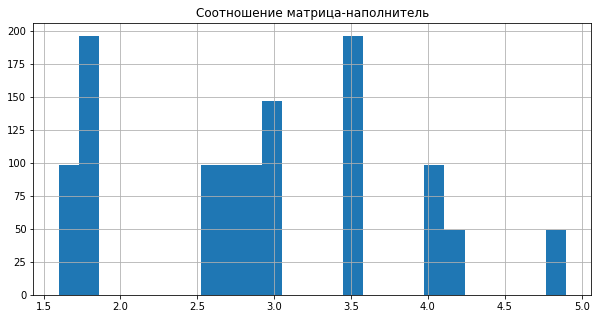

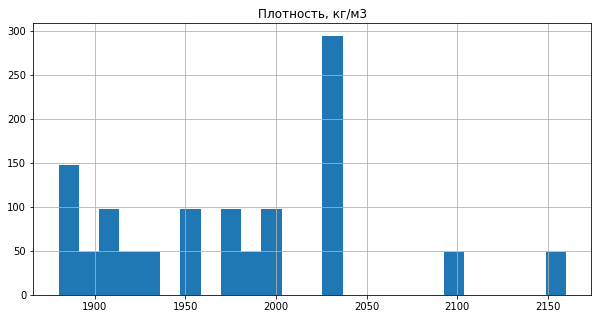

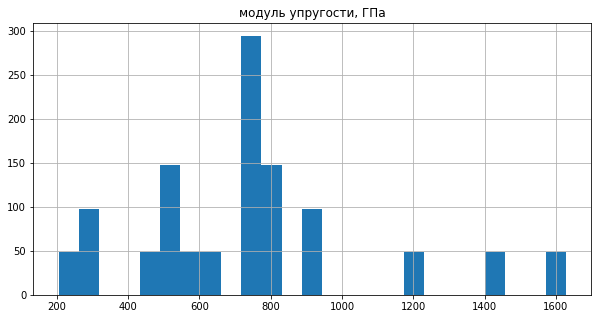

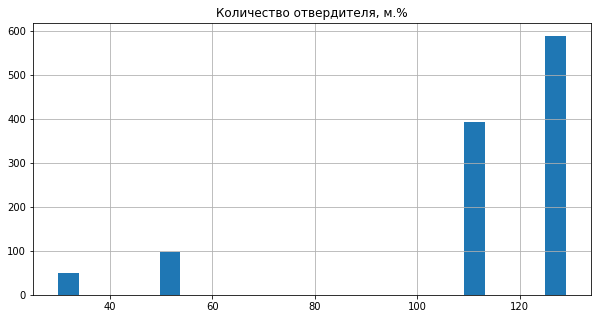

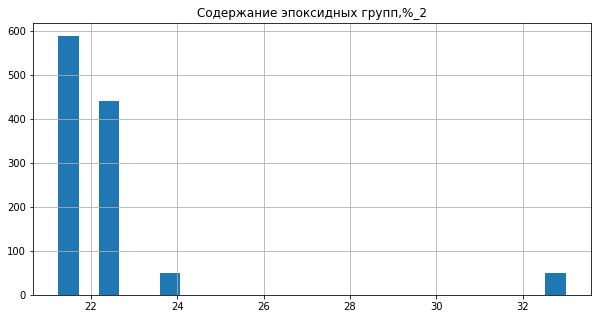

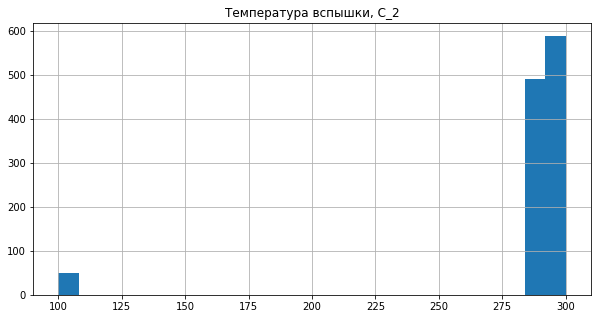

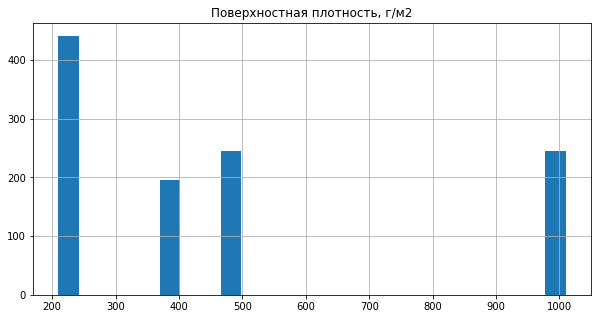

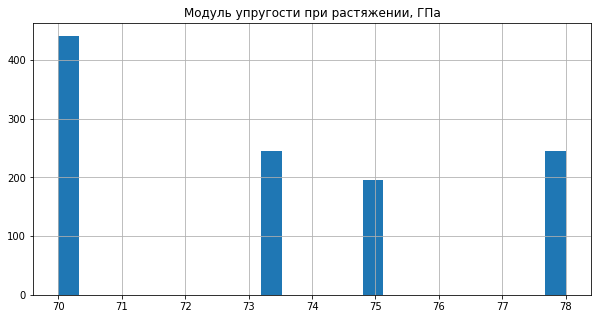

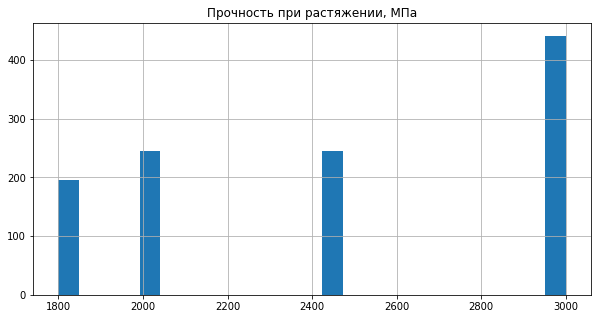

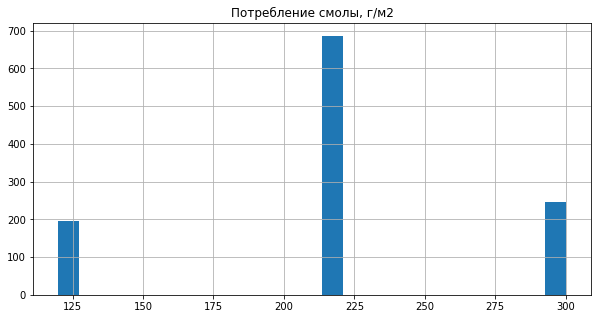

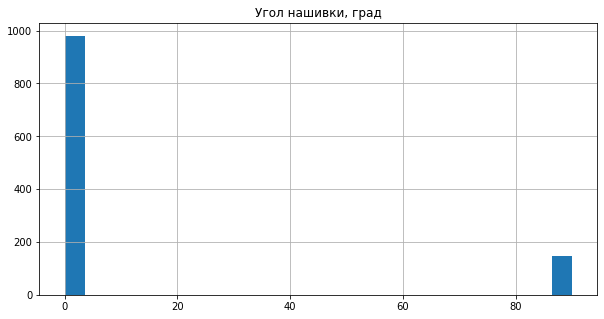

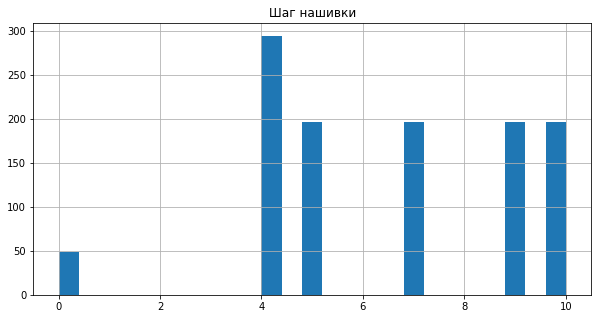

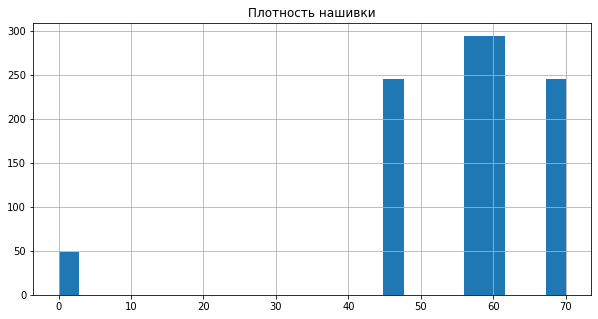

In [10]:
for column in df_bp_nup:
    plt.figure(column, figsize = (10, 5))
    plt.title(column)
    df_bp_nup[column].hist(bins=25)
    plt.show()

### Выводим тренд по всем столбцам

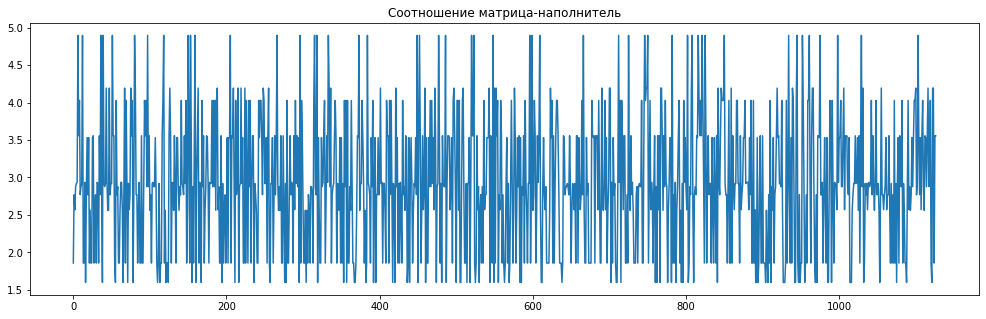

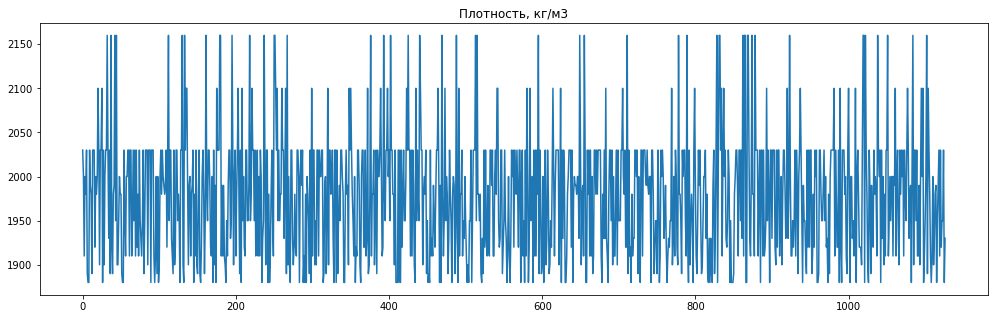

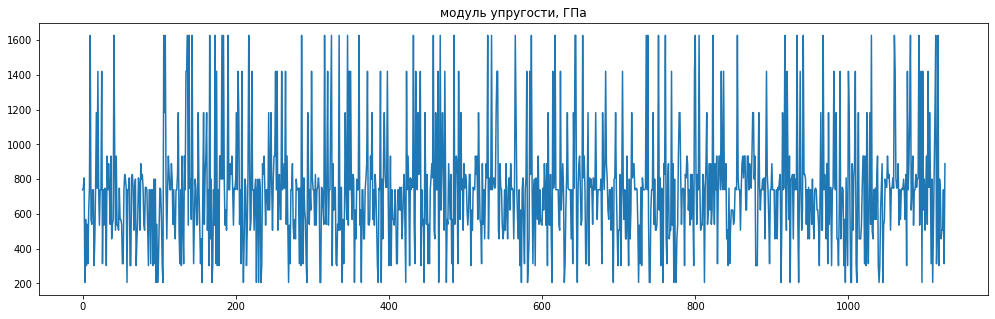

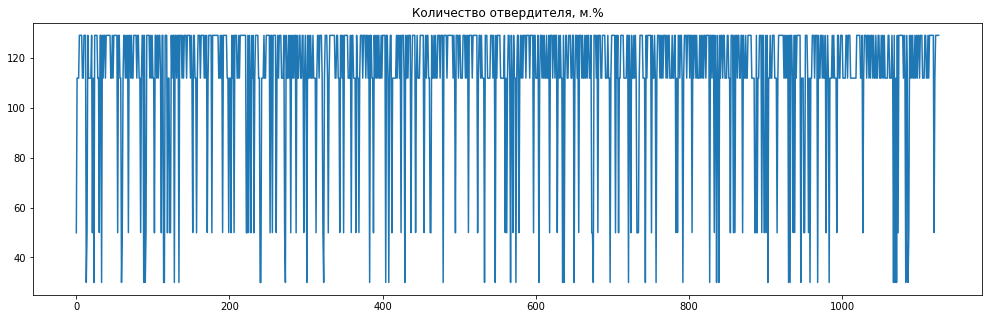

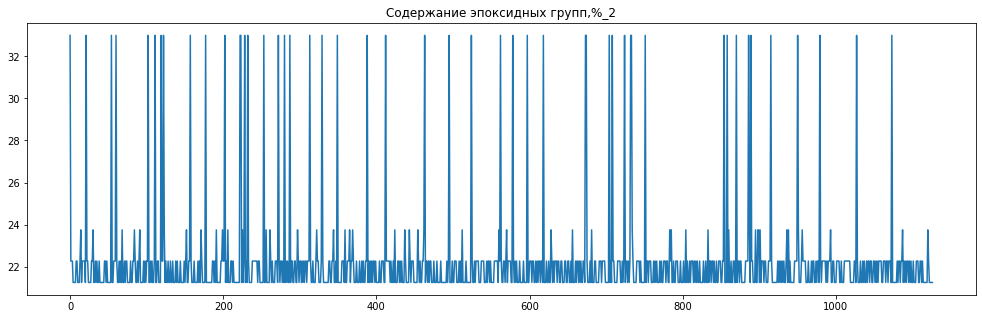

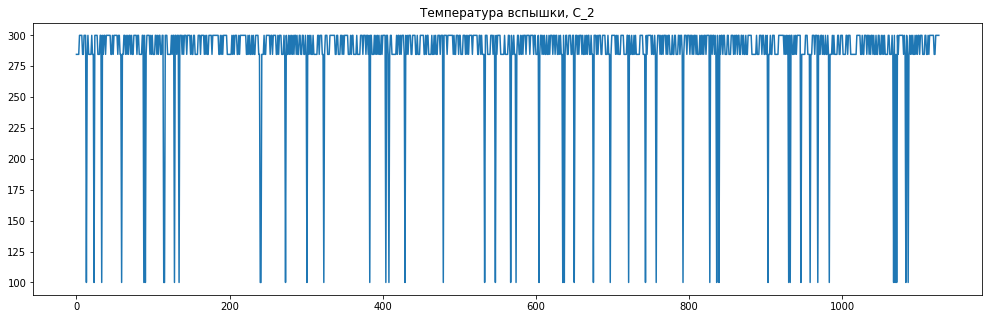

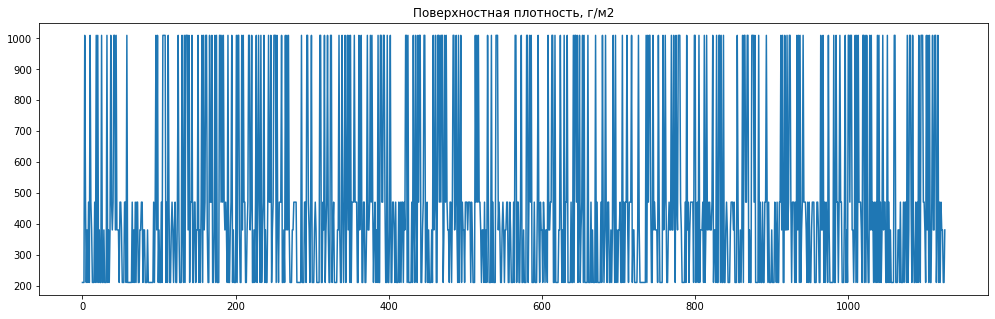

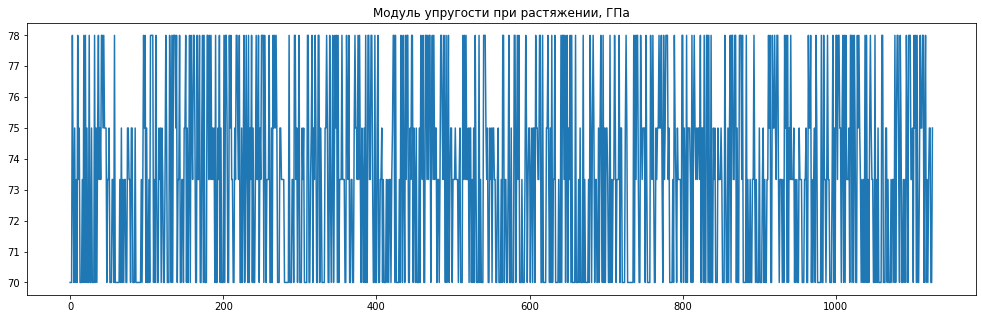

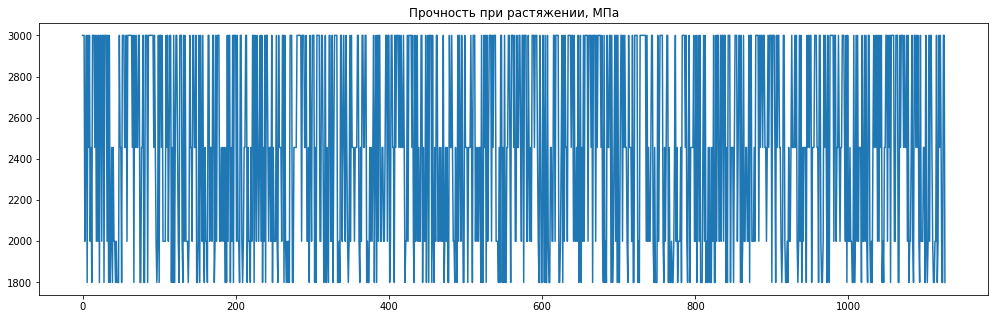

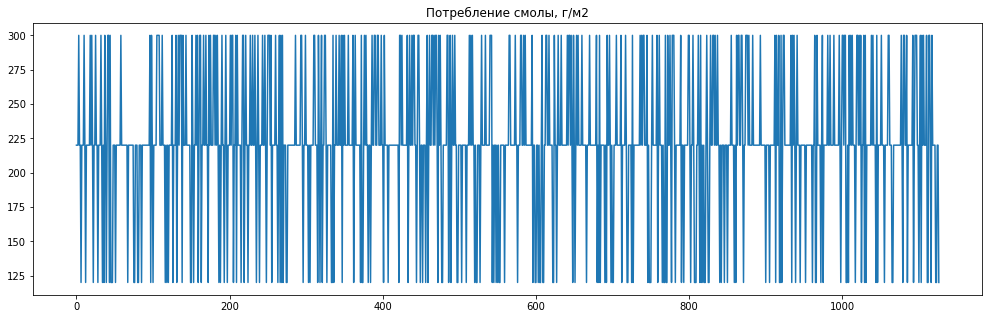

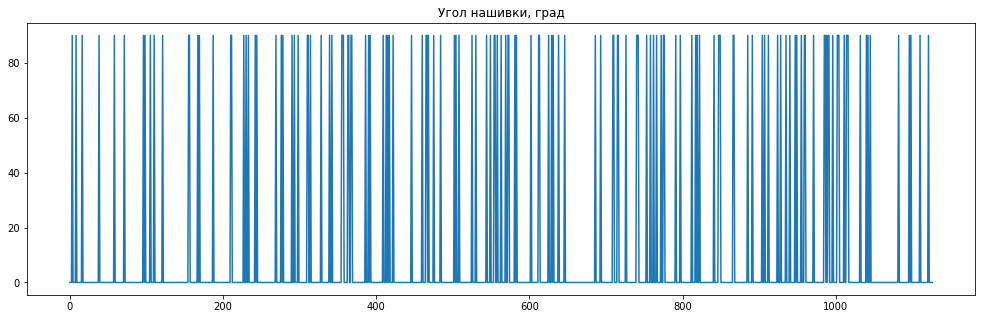

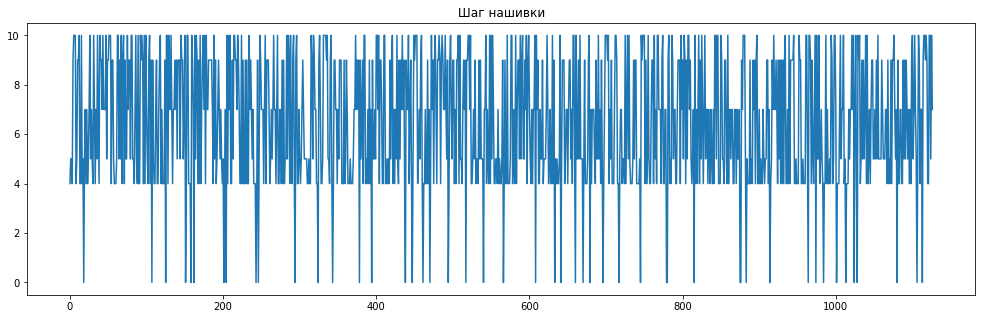

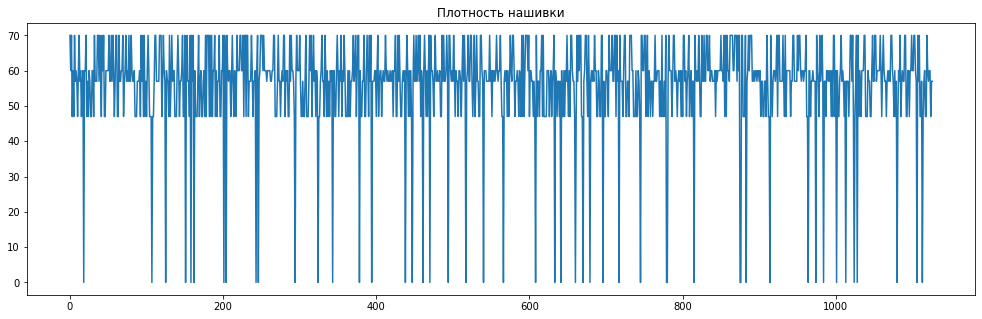

In [11]:
for column in df_bp_nup:
    plt.figure(column, figsize = (17, 5))
    plt.title(column)
    df_bp_nup[column].plot.line()

### Выводим матрицу рассеивания

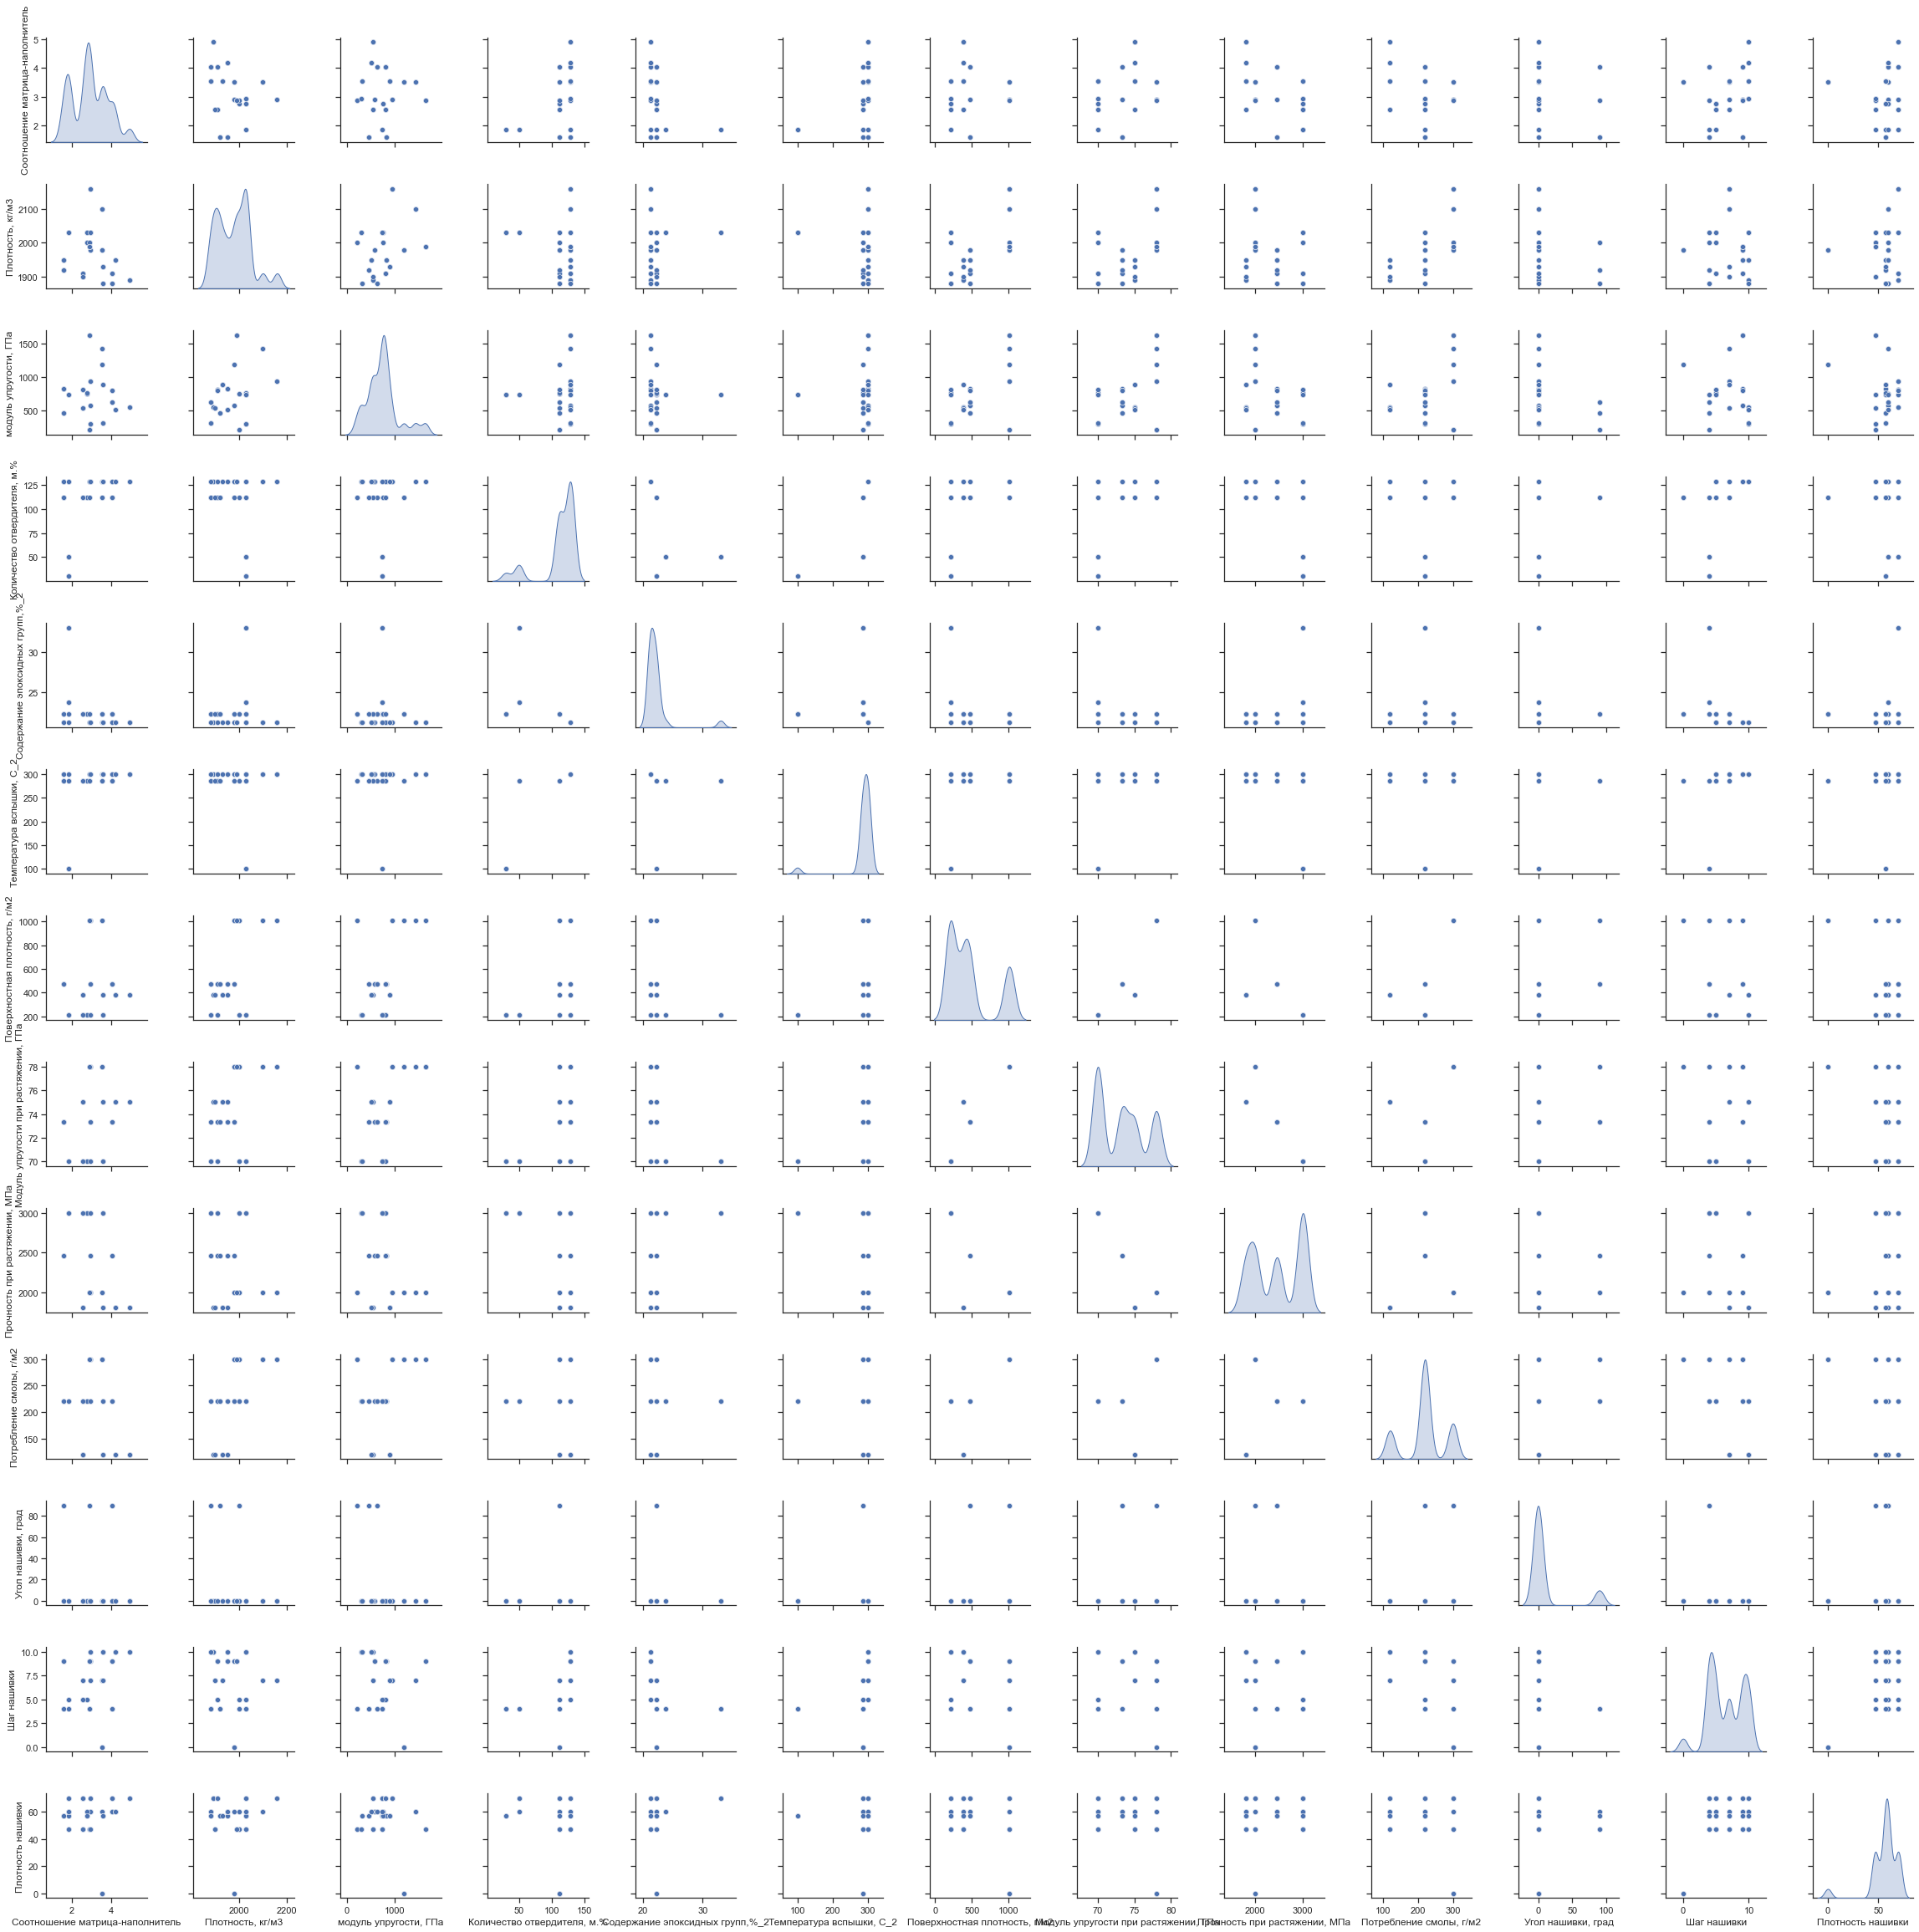

In [12]:
sns.set_theme(style="ticks")
sns.pairplot(df_bp_nup, diag_kind='kde', height=2.5) #hue = 'index' plot_kws={'alpha': 0.2}

### Вывод матрицы корреляции

<AxesSubplot:>

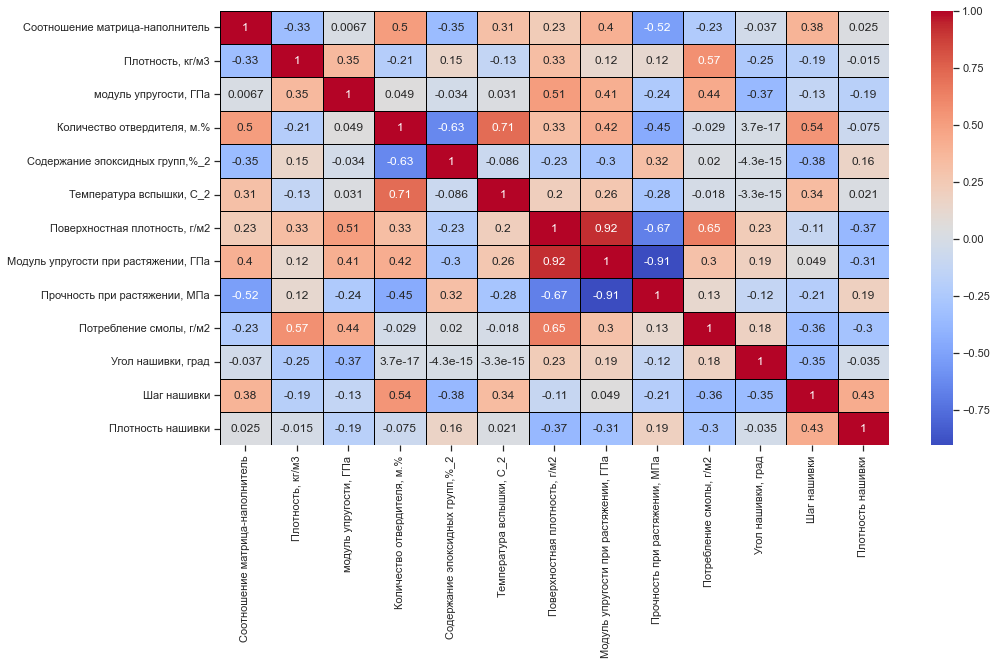

In [13]:
plt.figure(figsize = (15, 8))
sns.heatmap(df_bp_nup.corr(), cmap = "coolwarm", annot = True, linewidths=1, linecolor='black')

Отмечаем достаточно высокую корреляцию (выше 0.9) между "Поверхностная плотность" и "Модуль упругости при растяжении",
"Модуль упругости при растяжении" и "Прочность при растяжении".

## Стандартизируем датасет.

In [14]:
std_scaler = preprocessing.StandardScaler().fit(df_bp_nup)
np_std_scaler = std_scaler.transform(df_bp_nup)
df_std_scaler = pd.DataFrame(np_std_scaler, columns = list(df_bp_nup.columns))

<AxesSubplot:>

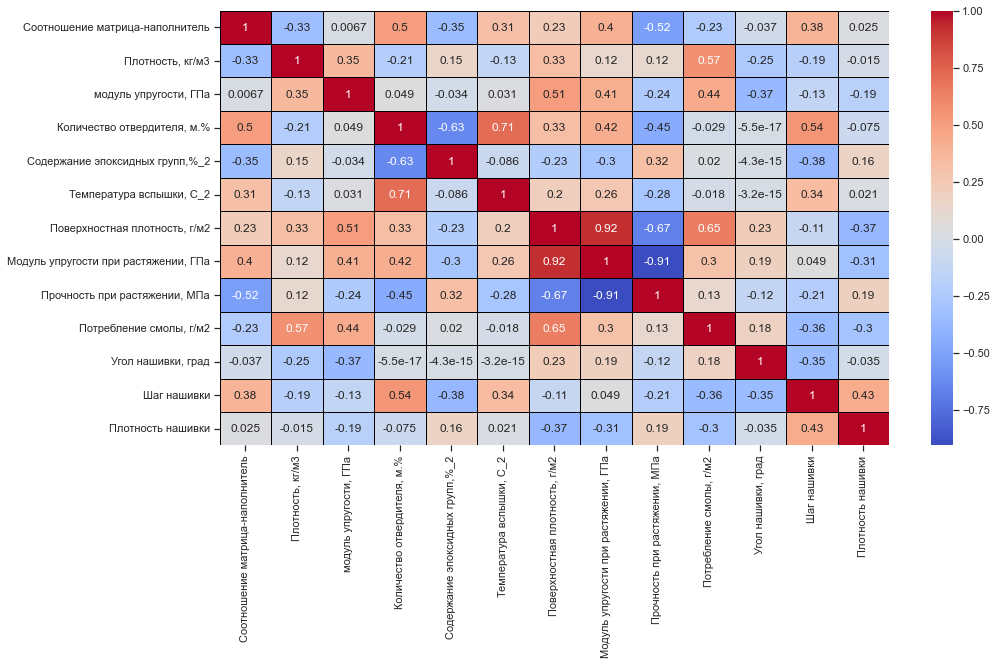

In [15]:
plt.figure(figsize = (15, 8))
sns.heatmap(df_std_scaler.corr(), cmap = "coolwarm", annot = True, linewidths=1, linecolor='black')

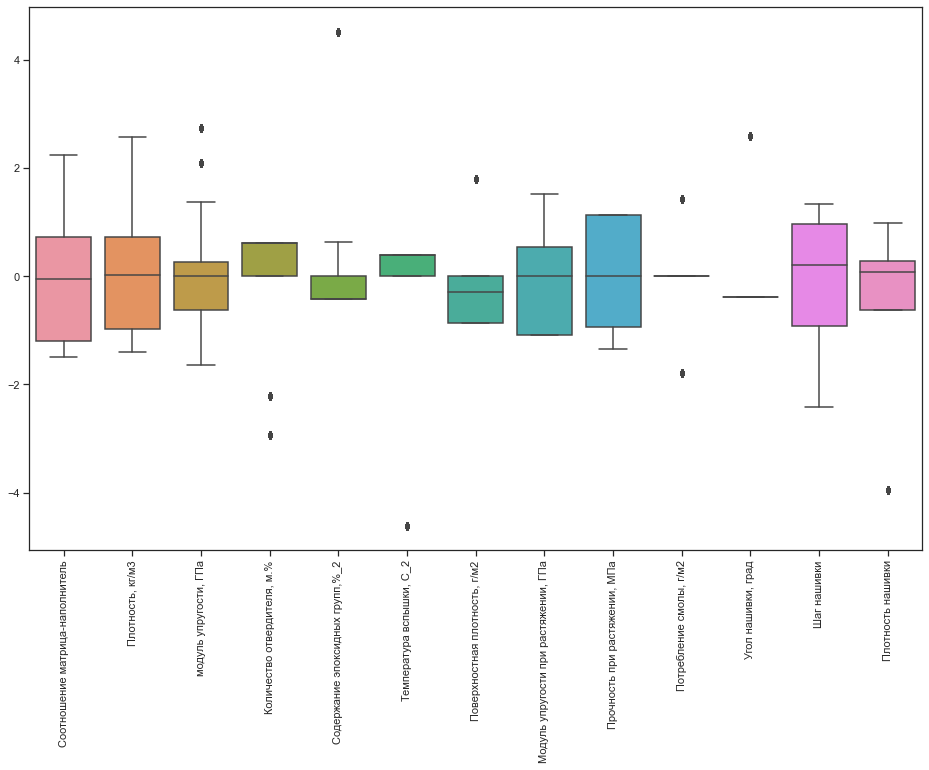

In [16]:
plt.figure(figsize=(16,10))
box_1 = sns.boxplot(data=df_std_scaler)
box_1 = box_1.set_xticklabels(box_1.get_xticklabels(),rotation=90)

Отмечаем наличие выбросов более 3 сигм, но количество исходных данных не велико, поэтому в том числе применена стандартизация а не нормальзация, для меньшего влияния выбросов.

## Сохраняем данные EDA_v01

In [17]:
pickle.dump(std_scaler, open('../data/processed/EDA_out_v01.pkl','wb'))

In [18]:
df_std_scaler.to_csv('../data/processed/EDA_out_v01.csv', index=False)

## Вывод:
    1. В условиях малого количества наблюдений, были выявление более высокие коэффициенты корреляции.
    2. Предположительно требуется сделать отбор параметров, т.к. не все параметры коррелируют друг с другом.